# DAA Experiment Harness (Template)
**Tujuan**: kerangka eksperimen untuk membandingkan *Algoritma A* vs *Algoritma B* pada instance unik per kelompok.
1. Isi `algo_A` dan `algo_B`.
2. Sesuaikan `generate_instances` atau loader data.
3. Atur `Ns`, `repeats`, `seed`.


In [ ]:
import os, time, random, statistics
from pathlib import Path
import numpy as np, pandas as pd
import matplotlib.pyplot as plt

Path('results').mkdir(exist_ok=True)

random.seed(42)
np.random.seed(42)

## Implementasi Algoritma (ISI)

In [ ]:
def algo_A(instance):
    # TODO: ganti implementasi sesuai proyek
    # Contoh placeholder (Insertion Sort untuk array)

    arr = list(instance)

    for i in range(1,len(arr)):
        key = arr[i]; j=i-1
        while j>=0 and arr[j]>key:
            arr[j+1]=arr[j]; j-=1
        arr[j+1]=key

    return arr

def algo_B(instance):
    # TODO: ganti implementasi sesuai proyek
    # Contoh placeholder (Merge Sort untuk array)

    def merge_sort(a):
        if len(a)<=1: return a
        m=len(a)//2
        L=merge_sort(a[:m]); R=merge_sort(a[m:])
        i=j=0; out=[]

        while i<len(L) and j<len(R):
            if L[i]<=R[j]: out.append(L[i]); i+=1
            else: out.append(R[j]); j+=1
        out.extend(L[i:]); out.extend(R[j:]); return out

    return merge_sort(list(instance))

## Pembangkit/Loader Instance (SESUIKAN)

In [ ]:
def generate_instances(n:int, seed:int=42):
    # Ganti sesuai kebutuhan (graf/puzzle/knapsack).

    rnd = random.Random(seed)
    return [rnd.randint(0,10**6) for _ in range(n)]

## Evaluator & Timing

In [ ]:
def evaluate_solution(sol):
    # Untuk sorting: gap=0 jika terurut.
    return 0.0 if isinstance(sol, list) and all(sol[i]<=sol[i+1] for i in range(len(sol)-1)) else 1.0

def run_once(algorithm, instance):
    t0=time.perf_counter(); out=algorithm(instance); dt=(time.perf_counter()-t0)*1000.0
    return dt, evaluate_solution(out)

## Eksekusi Eksperimen (atur parameter)

In [ ]:
Ns=[500,1000,2000,5000]
repeats=5
base_seed=123
rows=[]

for n in Ns:
    for r in range(repeats):
        inst=generate_instances(n, base_seed+r)
        dA, gA=run_once(algo_A, inst)
        dB, gB=run_once(algo_B, inst)
        rows.append({'n':n,'repeat':r,'algo':'A','time_ms':dA,'gap':gA})
        rows.append({'n':n,'repeat':r,'algo':'B','time_ms':dB,'gap':gB})

df=pd.DataFrame(rows)
df.to_csv('results/experiment_raw.csv', index=False)
summary=df.groupby(['algo','n']).agg(time_ms_mean=('time_ms','mean'), time_ms_sd=('time_ms','std'), gap_mean=('gap','mean')).reset_index()
summary.to_csv('results/summary.csv', index=False)

display(summary)

,algo,n,time_ms_mean,time_ms_sd,gap_mean
0,A,500,5.767485,0.727964,0.0
1,A,1000,22.791124,1.149949,0.0
2,A,2000,96.761437,1.624302,0.0
3,A,5000,629.716261,24.787679,0.0
4,B,500,0.846244,0.039380,0.0
5,B,1000,1.819164,0.018954,0.0
6,B,2000,4.525771,0.925892,0.0
7,B,5000,11.381807,0.294899,0.0


## Plot & Tabel

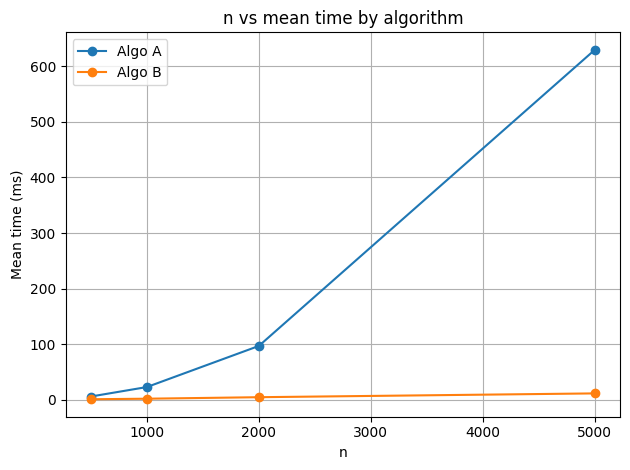

/tmp/ipython-input-2968621134.py:19: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=sorted(df['n'].unique()))


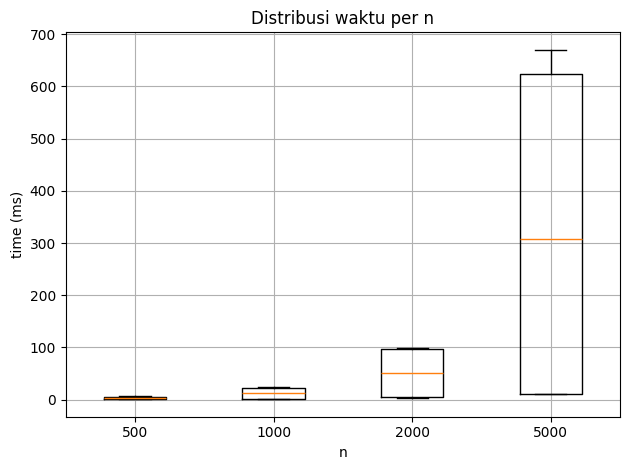

In [ ]:
plt.figure()

for algo in sorted(df['algo'].unique()):
    xs=sorted(df['n'].unique())
    ys=[summary[(summary['algo']==algo)&(summary['n']==x)]['time_ms_mean'].values[0] for x in xs]
    plt.plot(xs, ys, marker='o', label=f'Algo {algo}')

plt.xlabel('n')
plt.ylabel('Mean time (ms)')
plt.title('n vs mean time by algorithm')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('results/plot_n_vs_time.png', dpi=150)
plt.show()
plt.figure()

data=[df[df['n']==x]['time_ms'] for x in sorted(df['n'].unique())]
plt.boxplot(data, labels=sorted(df['n'].unique()))
plt.xlabel('n')
plt.ylabel('time (ms)')
plt.title('Distribusi waktu per n')
plt.grid(True)
plt.tight_layout()
plt.savefig('results/plot_box_time_per_n.png', dpi=150)
plt.show()

## (Opsional) Uji Statistik (paired t-test)

In [ ]:
try:
    from scipy.stats import ttest_rel

    for n in sorted(df['n'].unique()):
        a=df[(df['n']==n)&(df['algo']=='A')]['time_ms'].values
        b=df[(df['n']==n)&(df['algo']=='B')]['time_ms'].values
        t,p=ttest_rel(a,b)
        print(f'n={n}: t={t:.3f}, p={p:.4f}')

except Exception as e:
    print('SciPy tidak tersedia; lewati uji t berpasangan.', e)

n=500: t=14.704, p=0.0001
n=1000: t=40.786, p=0.0000
n=2000: t=101.120, p=0.0000
n=5000: t=55.545, p=0.0000


## Ekspor tabel LaTeX (opsional)

In [ ]:
latex_table=summary.rename(columns={'time_ms_mean':'Mean (ms)','time_ms_sd':'SD (ms)','gap_mean':'Gap'}).to_latex(index=False)

with open('results/summary.tex','w',encoding='utf-8') as f:
    f.write(latex_table)

print('Saved results/summary.tex')

Saved results/summary.tex
